In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sb

import matplotlib.pyplot as plt

plot_size = (12, 8)
sb.set_style('darkgrid')

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
def plot(plt, xlabel, ylabel="Count of Entries"):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
def plot_hist(d, bins, xlabel, take_log=True):
    total_points = len(d)
    removed_points = 0
    if(take_log):
        removed_points = removed_points + sum(d <= 0)
        d = d[d > 0]
        d = np.log10(d)
        xlabel = "Log of " + xlabel
    removed_points = removed_points + sum(d > bins[1]) + sum(d < bins[0])
    
    plt.figure(figsize=plot_size)
    plt.hist(d, bins=np.arange(bins[0], bins[1], bins[2]))
    plot(plt, xlabel)
    print("% Points removed : " + str(removed_points/total_points))
    
def normalize(d):
    d = d*1.0
    return (d-min(d))/(max(d) - min(d))

In [3]:
data_batsim = pd.read_csv("../transient/23-04_2w_static/batsim_staging_static.csv")
data_batsim = data_batsim[data_batsim['profile'] != "LAST_NOTIFY_profile"]

data_workload = []
with open('../transient/23-04_2w_static/workload.json') as json_file: 
    data_workload = json.load(json_file)
data_workload = pd.DataFrame(data_workload['jobs'])
data_workload = data_workload[data_workload['profile'] != "LAST_NOTIFY_profile"]

data_csv = pd.read_csv("../transient/23-04_2w_static/23_04_2w.csv")
data_csv = data_csv[data_csv['transfer_history.actually_transferred_size'] != 0]

In [4]:
data = pd.merge(data_workload, data_batsim, how='inner', on=['profile'])
print("Length of data : " + str(data.shape))

data['ratio_minus_1'] = (data['time_taken'] - data['execution_time'])/data['execution_time']

Length of data : (2152, 26)


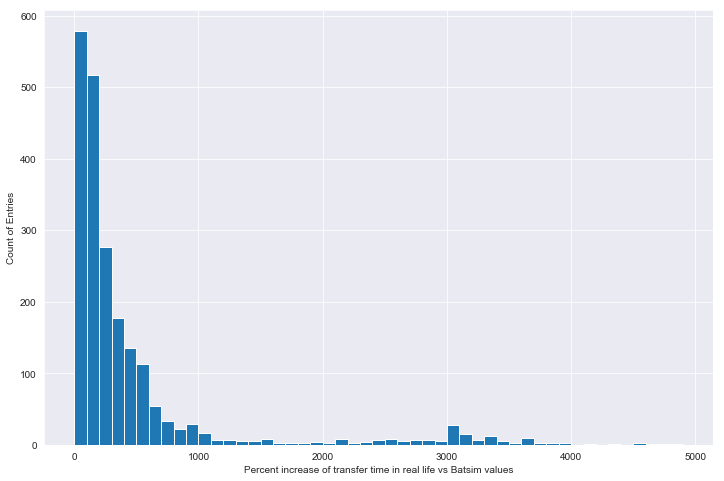

% Points removed : 0.0009293680297397769


In [5]:
plot_hist(data['ratio_minus_1'], (0, 5000, 100), "Percent increase of transfer time in real life vs Batsim values", take_log=False)

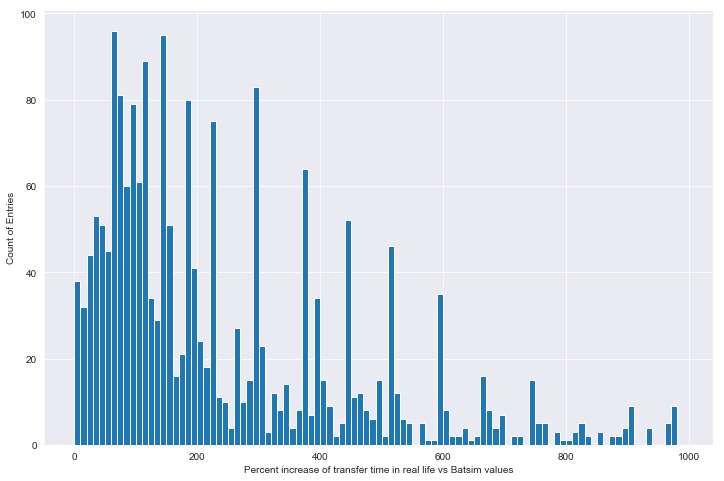

% Points removed : 0.10037174721189591


In [6]:
plot_hist(data['ratio_minus_1'], (0, 1000, 10), "Percent increase of transfer time in real life vs Batsim values", take_log=False)

In [7]:
data[data['ratio_minus_1'] > 100].to_csv("test.csv")